<a href="https://colab.research.google.com/github/hanzlayyy/FYDP/blob/main/FYDP_Notebook_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random as rd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/hanzlayyy/FYDP/main/data%20v1.csv')
#df.drop_duplicates(subset=df.iloc[:,:-1], keep='first', inplace=True, ignore_index=False)
df

,layer_height,infill_density,infill_pattern,nozzle_temperature,print_speed,material,roughness
0,0.02,90.0,grid,220,40.0,abs,25.0
1,0.02,90.0,honeycomb,225,40.0,abs,32.0
2,0.02,80.0,grid,230,40.0,abs,40.0
3,0.02,70.0,honeycomb,240,40.0,abs,68.0
4,0.02,90.0,grid,250,40.0,abs,92.0
...,...,...,...,...,...,...,...
654,0.20,40.0,NaN,195,30.0,pla,8.9
655,0.20,50.0,NaN,195,30.0,pla,4.9
656,0.30,30.0,NaN,195,30.0,pla,5.1
657,0.30,40.0,NaN,195,30.0,pla,19.3


In [6]:
df.dropna(thresh=6, inplace=True)
df

,layer_height,infill_density,infill_pattern,nozzle_temperature,print_speed,material,roughness
0,0.02,90.0,grid,220,40.0,abs,25.0
1,0.02,90.0,honeycomb,225,40.0,abs,32.0
2,0.02,80.0,grid,230,40.0,abs,40.0
3,0.02,70.0,honeycomb,240,40.0,abs,68.0
4,0.02,90.0,grid,250,40.0,abs,92.0
...,...,...,...,...,...,...,...
654,0.20,40.0,NaN,195,30.0,pla,8.9
655,0.20,50.0,NaN,195,30.0,pla,4.9
656,0.30,30.0,NaN,195,30.0,pla,5.1
657,0.30,40.0,NaN,195,30.0,pla,19.3


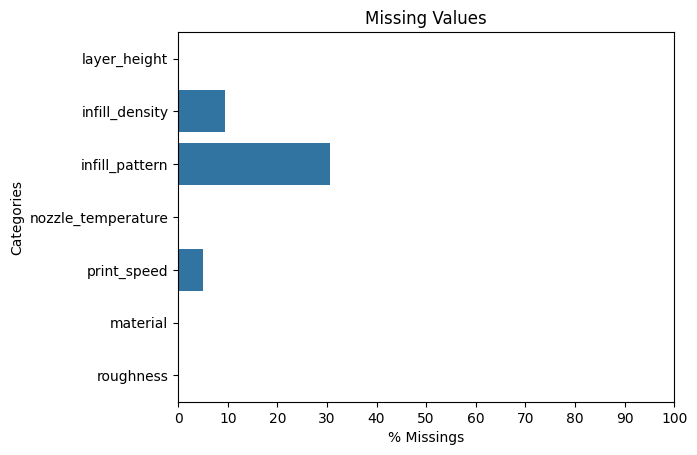

In [7]:
x_1 = pd.Series(df.isnull().mean()*100).values
y_1 = pd.Series(df.isnull().mean()*100).index
sns.barplot(x=x_1, y=y_1, orient='h')
plt.xlabel('% Missings')
plt.xticks(range(0, 110, 10))
plt.ylabel('Categories')
plt.title('Missing Values')
plt.show()

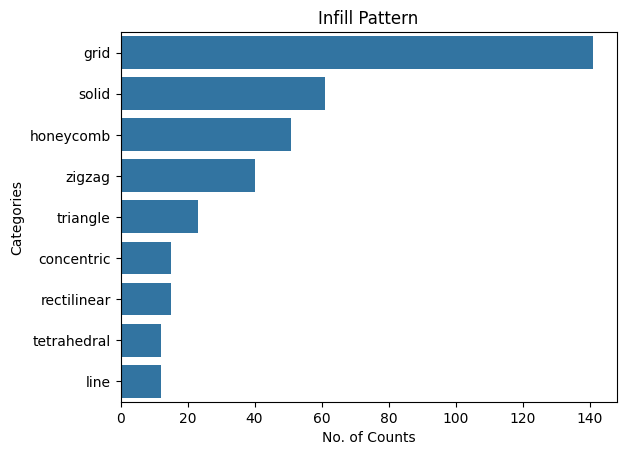

In [8]:
x_2 = pd.Series(df['infill_pattern'].value_counts()).values
y_2 = pd.Series(df['infill_pattern'].value_counts()).index
sns.barplot(x=x_2, y=y_2, orient='h')
plt.xlabel('No. of Counts')
plt.ylabel('Categories')
plt.title('Infill Pattern')
plt.show()

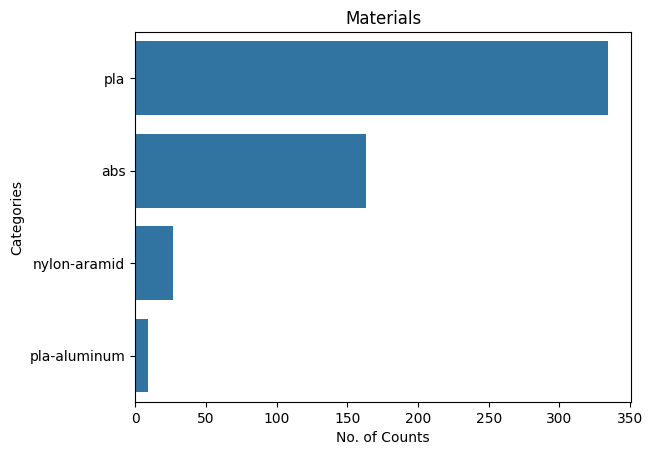

In [9]:
df['material'].value_counts()
x_3 = pd.Series(df['material'].value_counts()).values
y_3 = pd.Series(df['material'].value_counts()).index
sns.barplot(x=x_3, y=y_3, orient='h')
plt.xlabel('No. of Counts')
plt.ylabel('Categories')
plt.title('Materials')
plt.show()

In [10]:
zero_missing = pd.get_dummies(df[~df.isnull().any(axis=1)], columns=['infill_pattern','material'], dtype=int)
zero_missing.sample(10)


,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
19,0.06,50.0,220,60.0,74.0,0,0,1,0,0,0,0,0,0,1,0
574,0.10,100.0,240,30.0,56.0,0,0,0,0,0,1,0,0,1,0,0
543,0.30,10.0,215,120.0,2.0,0,0,0,0,1,0,0,0,1,0,0
270,0.15,30.0,200,80.0,3.0,0,0,0,0,0,0,0,1,0,1,0
504,0.30,100.0,200,20.0,39.0,0,0,0,0,0,1,0,0,0,1,0
444,0.10,20.0,200,60.0,16.0,0,1,0,0,0,0,0,0,1,0,0
381,0.25,40.0,195,50.0,17.0,0,1,0,0,0,0,0,0,0,1,0
40,0.20,80.0,220,40.0,212.0,0,1,0,0,0,0,0,0,1,0,0
11,0.06,20.0,225,60.0,92.0,0,0,1,0,0,0,0,0,1,0,0
1,0.02,90.0,225,40.0,32.0,0,0,1,0,0,0,0,0,1,0,0


In [11]:
missing = df[df.isnull().any(axis=1)]
missing_categorical = df[df['infill_pattern'].isnull()]
missing_categorical = pd.get_dummies(missing_categorical, columns=['material'], dtype=int)
missing_categorical[['material_pla-aluminum']] = 0
missing_categorical = missing_categorical.reindex(columns=list(zero_missing.columns))
missing_categorical


,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
190,0.20,30.0,210,30.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
191,0.15,20.0,190,75.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
192,0.20,10.0,190,30.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
193,0.20,20.0,200,75.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
194,0.10,10.0,190,120.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,0.20,40.0,195,30.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
655,0.20,50.0,195,30.0,4.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
656,0.30,30.0,195,30.0,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
657,0.30,40.0,195,30.0,19.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0


In [12]:
missing_numerical = missing[~missing['infill_pattern'].isnull()]
missing_numerical = pd.get_dummies(missing_numerical, columns=['infill_pattern','material'], dtype=int)
missing_numerical.drop(columns='infill_pattern_tetrahedral')
missing_numerical[['infill_pattern_rectilinear','infill_pattern_solid']] = 0
missing_numerical[['material_pla-aluminum']] = 0
missing_numerical = missing_numerical.reindex(columns=list(zero_missing.columns))
missing_numerical

,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
50,0.20,70.0,280,NaN,2.0,0,0,0,0,0,0,0,0,0,0,0
51,0.20,80.0,280,NaN,2.0,0,0,0,0,0,0,0,0,0,0,0
52,0.20,90.0,280,NaN,2.0,0,0,0,0,0,0,0,0,0,0,0
53,0.20,70.0,290,NaN,2.0,0,0,1,0,0,0,0,0,0,0,0
54,0.20,80.0,290,NaN,2.0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,0.05,NaN,205,50.0,6.0,0,1,0,0,0,0,0,0,0,1,0
570,0.15,NaN,190,50.0,14.0,0,1,0,0,0,0,0,0,0,1,0
571,0.25,NaN,220,50.0,17.0,0,1,0,0,0,0,0,0,0,1,0
572,0.25,NaN,205,30.0,18.0,0,1,0,0,0,0,0,0,0,1,0


In [13]:
n = []
mse = []
for r in range(120):
  k_1=3+2*r
  knn_1 = KNNImputer(n_neighbors=k_1, weights='distance')
  X_train, X_test = train_test_split(zero_missing, test_size=0.2, random_state=42)
  pd.DataFrame(knn_1.fit_transform(X_train))
  X_test.columns = zero_missing.columns
  X_test_copy = X_test.copy()
  X_test_copy
  np.random.seed(15)
  features =['infill_density', 'print_speed']
  for col in X_test_copy[features]:
    X_test_copy.loc[X_test_copy.sample(frac=0.1, replace=True).index,col] = np.nan
  X_test_copy.isnull().mean()
  X_test_predicted = pd.DataFrame(knn_1.transform(X_test_copy), columns=X_test_copy.columns)
  mse_1= mean_squared_error(X_test['infill_density'], X_test_predicted['infill_density'])
  mse_2= mean_squared_error(X_test['print_speed'], X_test_predicted['print_speed'])
  mse_3 =mse_1*mse_2
  n.append(k_1)
  mse.append(mse_3)

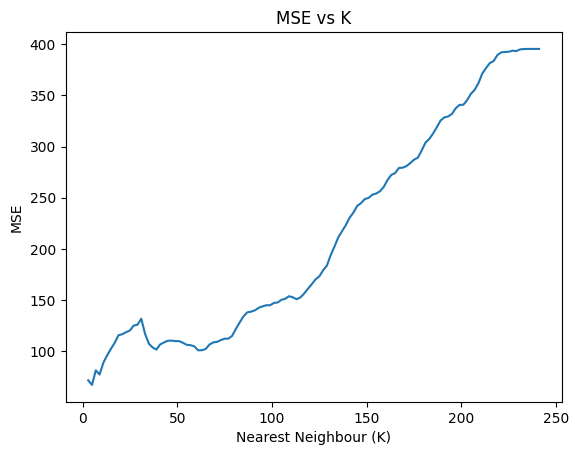

5

In [14]:
plt.plot(n, mse)
plt.xlabel('Nearest Neighbour (K)')
plt.ylabel('MSE')
plt.title('MSE vs K')
plt.show()
mse.index(min(mse))*2+3

In [15]:
knn_1 = KNNImputer(n_neighbors=mse.index(min(mse))*2+3)
knn_1.fit_transform(X_train)
missing_numerical_filled = pd.DataFrame(knn_1.transform(missing_numerical), columns=missing_numerical.columns)
zero_missing = pd.concat([zero_missing, missing_numerical_filled], axis=0)
zero_missing

,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
0,0.02,90.0,220.0,40.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.02,90.0,225.0,40.0,32.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.02,80.0,230.0,40.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.02,70.0,240.0,40.0,68.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.02,90.0,250.0,40.0,92.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.05,32.0,205.0,50.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
73,0.15,32.0,190.0,50.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74,0.25,64.0,220.0,50.0,17.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75,0.25,62.0,205.0,30.0,18.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
list(zero_missing.columns)[5:13]

['infill_pattern_concentric',
 'infill_pattern_grid',
 'infill_pattern_honeycomb',
 'infill_pattern_line',
 'infill_pattern_rectilinear',
 'infill_pattern_solid',
 'infill_pattern_triangle',
 'infill_pattern_zigzag']

In [17]:
n = []
r2 = []
for r in range(120):
  k=3+2*r
  knn = KNNImputer(n_neighbors=k, weights='distance')
  X_train, X_test = train_test_split(zero_missing, test_size=0.2, random_state=42)
  pd.DataFrame(knn.fit_transform(X_train))
  X_test.columns = zero_missing.columns
  X_test_copy = X_test.copy()
  X_test_copy
  np.random.seed(15)
  features = list(zero_missing.columns)[5:13]
  for col in X_test_copy[features]:
    X_test_copy.loc[X_test_copy.sample(frac=0.1, replace=True).index,col] = np.nan
  X_test_copy.isnull().mean()
  X_test_predicted = pd.DataFrame(knn_1.transform(X_test_copy), columns=X_test_copy.columns)
  r1 = mean_squared_error(X_test.loc[:,list(zero_missing.columns)[5:13]], X_test_predicted.loc[:,list(zero_missing.columns)[5:13]])
  n.append(k)
  r2.append(r)

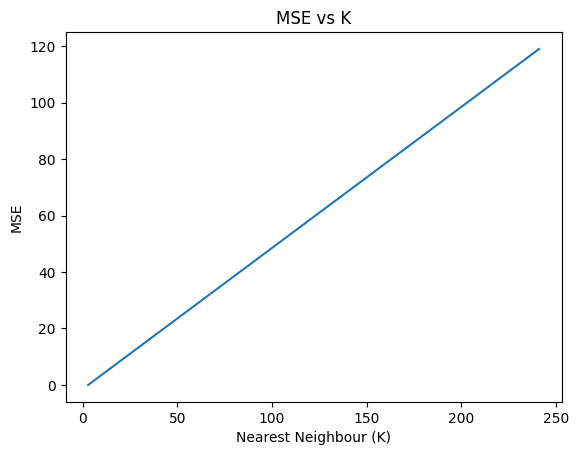

3

In [18]:
plt.plot(n, r2)
plt.xlabel('Nearest Neighbour (K)')
plt.ylabel('MSE')
plt.title('MSE vs K')
plt.show()
r2.index(min(r2))*2+3

In [19]:
knn_2 = KNNImputer(n_neighbors=r2.index(min(r2))*2+3)
knn_2.fit_transform(X_train)
missing_categorical_filled = pd.DataFrame(knn_1.transform(missing_categorical), columns=missing_categorical.columns)
zero_missing = pd.concat([zero_missing, missing_categorical_filled], axis=0)
zero_missing
df1 = zero_missing
df1

,layer_height,infill_density,nozzle_temperature,print_speed,roughness,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
0,0.02,90.0,220.0,40.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.02,90.0,225.0,40.0,32.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.02,80.0,230.0,40.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.02,70.0,240.0,40.0,68.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.02,90.0,250.0,40.0,92.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.20,40.0,195.0,30.0,8.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
159,0.20,50.0,195.0,30.0,4.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
160,0.30,30.0,195.0,30.0,5.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
161,0.30,40.0,195.0,30.0,19.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
#df1['material_pla-aluminum'].value_counts()


In [21]:
for row in range(len(df1)):
  max = df1.iloc[row,5:13].max()
  for a in range(9):
    if  df1.iloc[row,5+a]== max and max!=0:
      df1.iat[row,a+5]=1
    else:
      df1.iat[row,a+5]=0

In [22]:
df1 = df1[df1.iloc[:,5:13].sum(axis=1)!=2]
df1 = df1.reindex(columns=['layer_height', 'infill_density', 'nozzle_temperature', 'print_speed', 'infill_pattern_concentric', 'infill_pattern_grid',
                    'infill_pattern_honeycomb', 'infill_pattern_line','infill_pattern_rectilinear', 'infill_pattern_solid','infill_pattern_triangle',
                    'infill_pattern_zigzag', 'material_abs','material_pla', 'material_pla-aluminum','roughness'])
df1

,layer_height,infill_density,nozzle_temperature,print_speed,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum,roughness
0,0.02,90.0,220.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25.0
1,0.02,90.0,225.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,32.0
2,0.02,80.0,230.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0
3,0.02,70.0,240.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,68.0
4,0.02,90.0,250.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,0.20,40.0,195.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.9
159,0.20,50.0,195.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.9
160,0.30,30.0,195.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.1
161,0.30,40.0,195.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.3


In [23]:
df1.to_csv('data_v2.csv')

In [24]:
X = df1.iloc[:,0:15]
y = df1.iloc[:,15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
param_grid = {'n_estimators':list(range(10, 201, 50))}
reg = GridSearchCV(RandomForestRegressor(random_state=42),param_grid=param_grid)
reg.fit(X_train,y_train)
reg.best_params_['n_estimators']
rt = RandomForestRegressor(n_estimators=reg.best_params_['n_estimators'], random_state=42)
rt.fit(X_train,y_train)
y_pred = rt.predict(X_test)
r2_score(y_test,y_pred)

0.669344894869585

In [25]:
'''!pip install geneticalgorithm

from geneticalgorithm import geneticalgorithm as ga
def obj_fun(X):
    X = [X]
    results = rt.predict(X)
    return results

In [26]:
boundaries = np.array(X.describe().loc[["min","max"],:].T)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||_____________________________________________ 10.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||________________________________________ 20.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||___________________________________ 30.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||||||||||||______________________________ 40.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||_________________________ 50.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||||||||||||||||||||||____________________ 60.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||||||||||||_______________ 70.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

||||||||||||||||||||||||||||||||||||||||__________ 80.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||||||||||||||||||||||_____ 90.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

 The best solution found:
 [1.02858279e-01 7.80250628e+01 2.50777288e+02 7.79797592e+01
 4.70609614e-01 8.45424595e-02 3.09808134e-01 7.23141630e-01
 9.73377756e-01 9.28262762e-01 9.69131057e-01 3.11558521e-01
 1.64563791e-01 3.34196222e-01 2.51506287e-01]

 Objective function:
 3.108767746212121


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

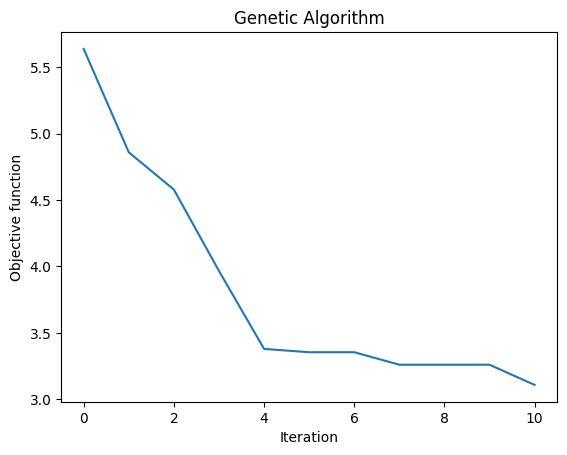

In [27]:
'''algorithm_param = {'max_num_iteration': 10,\
                   'population_size':100,\
                   'mutation_probability':0.01,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.9,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
ga_model=ga(function=obj_fun, dimension=15,variable_type='real',variable_boundaries=boundaries, algorithm_parameters=algorithm_param)
ga_model.run()

In [28]:
'''result = ga_model.output_dict
result

{'variable': array([1.02858279e-01, 7.80250628e+01, 2.50777288e+02, 7.79797592e+01,
        4.70609614e-01, 8.45424595e-02, 3.09808134e-01, 7.23141630e-01,
        9.73377756e-01, 9.28262762e-01, 9.69131057e-01, 3.11558521e-01,
        1.64563791e-01, 3.34196222e-01, 2.51506287e-01]),
 'function': 3.108767746212121}

In [29]:
print("Results: ")
print('Layer Height:', result['variable'][0])
print('Infill Density:', result['variable'][1])
print('Nozzel Temperature:', result['variable'][2])
print('Print Speed:', result['variable'][3])

Results: 
Layer Height: 0.10285827938854986
Infill Density: 78.02506277737547
Nozzel Temperature: 250.77728764841243
Print Speed: 77.97975917754962


In [30]:
!pip install pandas-profiling

In [31]:
"""from ydata_profiling import ProfileReport
prof = ProfileReport(df1)
prof.to_file(output_file='output.html')"""

"from ydata_profiling import ProfileReport\nprof = ProfileReport(df1)\nprof.to_file(output_file='output.html')"

In [32]:
X = df1.iloc[:,0:15]
y = df1.iloc[:,15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
np.round(X_train_scaled.describe(),1)

,layer_height,infill_density,nozzle_temperature,print_speed,infill_pattern_concentric,infill_pattern_grid,infill_pattern_honeycomb,infill_pattern_line,infill_pattern_rectilinear,infill_pattern_solid,infill_pattern_triangle,infill_pattern_zigzag,material_abs,material_pla,material_pla-aluminum
count,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0,397.0
mean,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.8,-1.2,-1.1,-1.4,-0.2,-0.8,-0.4,-0.2,-0.2,-0.5,-0.2,-0.3,-0.5,-1.4,-0.1
25%,-0.9,-0.9,-0.7,-0.8,-0.2,-0.8,-0.4,-0.2,-0.2,-0.5,-0.2,-0.3,-0.5,-1.4,-0.1
50%,-0.4,-0.3,-0.3,-0.1,-0.2,-0.8,-0.4,-0.2,-0.2,-0.5,-0.2,-0.3,-0.5,0.7,-0.1
75%,0.8,0.9,0.3,0.6,-0.2,1.2,-0.4,-0.2,-0.2,-0.5,-0.2,-0.3,-0.5,0.7,-0.1
max,2.4,1.5,3.3,2.9,5.9,1.2,2.6,4.6,5.2,2.2,4.3,2.9,1.9,0.7,7.5


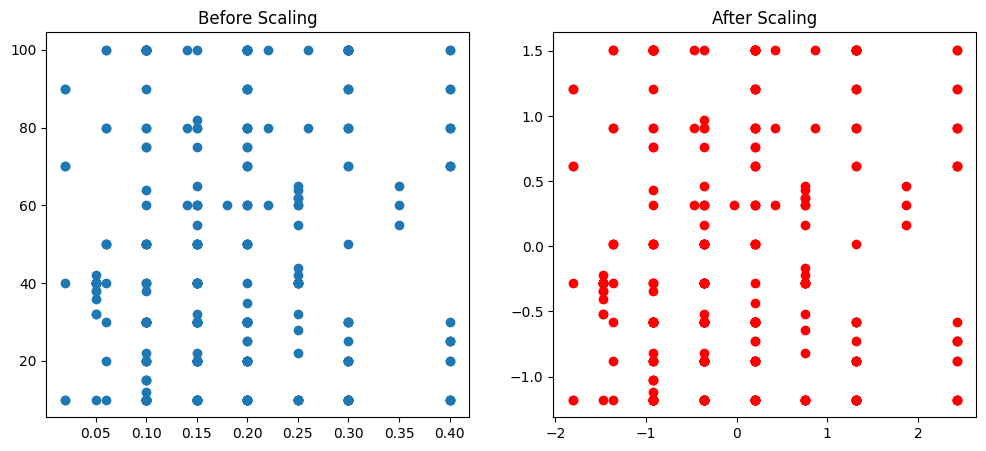

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['layer_height'], X_train['infill_density'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['layer_height'], X_train_scaled['infill_density'],color='red')
ax2.set_title("After Scaling")
plt.show()

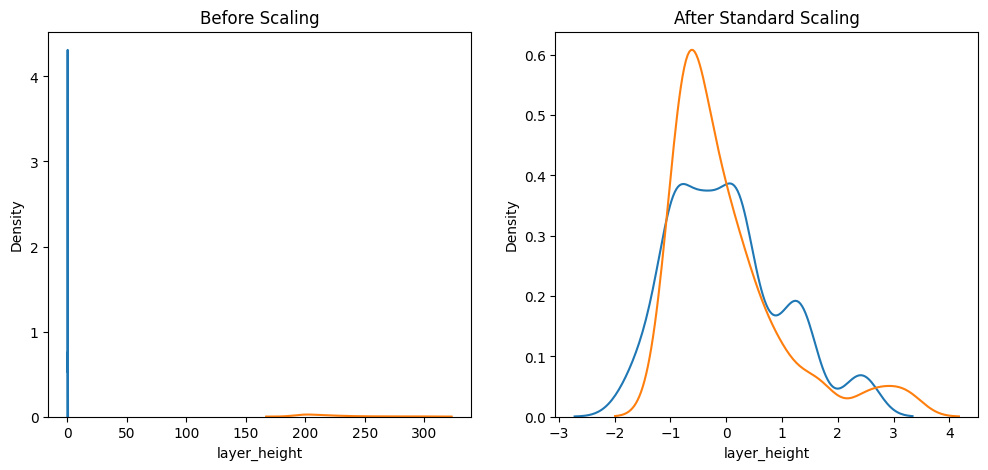

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['layer_height'], ax=ax1)
sns.kdeplot(X_train['nozzle_temperature'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['layer_height'], ax=ax2)
sns.kdeplot(X_train_scaled['nozzle_temperature'], ax=ax2)
plt.show()

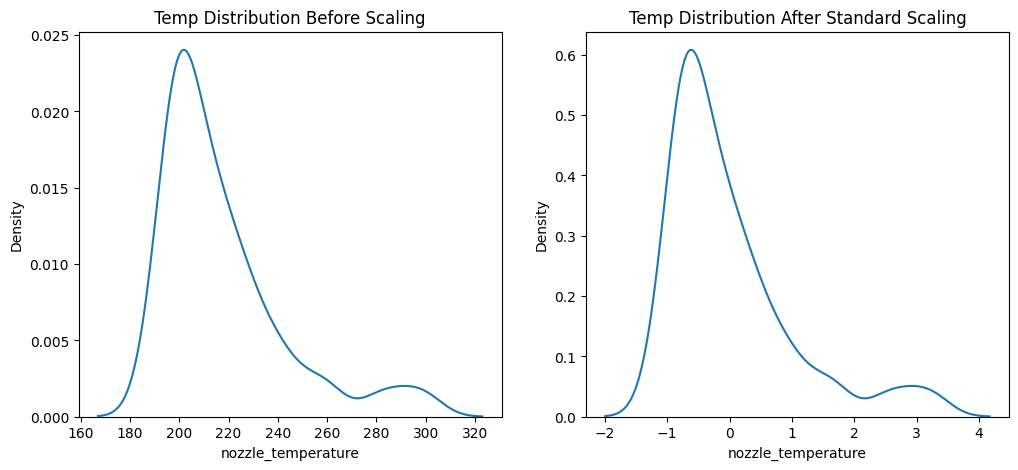

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Temp Distribution Before Scaling')
sns.kdeplot(X_train['nozzle_temperature'], ax=ax1)

# after scaling
ax2.set_title('Temp Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['nozzle_temperature'], ax=ax2)
plt.show()

In [36]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

In [64]:
#poly = PolynomialFeatures(degree=9,include_bias=True)
#X_train_trans = poly.fit_transform(X_train_scaled)
#X_test_trans = poly.transform(X_test_scaled)
sgd = KNeighborsRegressor(n_neighbors=2, weights='distance' )
sgd.fit(X_train_scaled,y_train)
y_pred = sgd.predict(X_test_scaled)
r2_score(y_pred,y_test)

0.706959898070591

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [77]:
model = Sequential()
model.add(Dense(64, input_dim=15, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Step 5: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Step 6: Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

# Step 7: Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

4/4 [==============================] - 0s 3ms/step
Mean Squared Error: 1103.4283255090313
R^2 Score: 0.2929934391619079


In [83]:
from geneticalgorithm import geneticalgorithm as ga
def obj_fun(X):
    X = [X]
    results = model.predict(X)
    return results

In [86]:
boundaries = np.array(X.describe().loc[["min","max"],:].T)
algorithm_param = {'max_num_iteration': 20,\
                   'population_size':150,\
                   'mutation_probability':0.02,\
                   'elit_ratio': 0.02,\
                   'crossover_probability': 0.8,\
                   'parents_portion': 0.4,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}
ga_model=ga(function=obj_fun, dimension=15,variable_type='real',variable_boundaries=boundaries, algorithm_parameters=algorithm_param)
ga_model.run()

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=('tf.Tensor(shape=(None,), dtype=float32)',)
      • training=False
      • mask=None


In [85]:
result = ga_model.output_dict
result

AttributeError: 'geneticalgorithm' object has no attribute 'output_dict'